In [53]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [178]:
subjsIS = ['testP3','testP4','testP5','testP10','trainP3','trainP4','trainP5','trainP10']
subjsUS = ['testP1','testP3','testP6','testP7','testP8','trainP1','trainP3','trainP6','trainP7','trainP8'] 
subjsField = ['P3','P4','P5','P7','P10','P11','P12','P13','P14','P17','P18','P23','P24'] 

subjsProt = {'IS':subjsIS, 'US':subjsUS, 'Field':subjsField}
pathProt = {'IS':'IS', 'US':'US', 'Field':'Field/testdata_labeled'}


def save_SenseEat_FG_raw(protocol):
    if protocol == 'IS' or protocol == 'US':
        columns = ['Time','Angular_Velocity_x','Angular_Velocity_y','Angular_Velocity_z','Linear_Accel_x','Linear_Accel_y','Linear_Accel_z','unixtime','synctime','feedingClass','nonfeedingClass']
    if protocol == 'Field':
        columns = ['Angular_Velocity_x','Angular_Velocity_y','Angular_Velocity_z','Linear_Accel_x','Linear_Accel_y','Linear_Accel_z','label']
    df_l = []
    
    subjs = subjsProt[protocol]

    for subj in subjs:
        file_path = '../WillSense/code/WS/'+pathProt[protocol]+'/'+subj+'/testdata_labeled.csv'
        df = pd.read_csv(file_path)
        print(len(df))
        if protocol == 'IS' or protocol == 'US':
            pw = df.feedingClass.as_matrix()
            print(np.unique(pw))
        if protocol == 'Field':
            pw = df.label.as_matrix()
            print(np.unique(pw))


        pw = pw.astype(int)
        print(len(pw))
        
        diff = np.hstack((pw,0)) - np.hstack((0,pw))
        head_list = np.where( diff == 1 )[0]
        tail_list = np.where( diff == -1 )[0]
        
        fg_folder = '../WillSense/code/WS/'+pathProt[protocol]+'/'+subj+'/feeding_gestures/'
        if not os.path.exists(fg_folder):
            os.makedirs(fg_folder)
            
        for i in range(len(head_list)):
            df.iloc[head_list[i]:tail_list[i]].to_csv(fg_folder + '/fg_' + str(i) + '.csv')
            
            text_file = open(fg_folder + 'len_' + str(i) + '.txt', 'w')
            text_file.write('%d' % (tail_list[i]-head_list[i]))
            text_file.close()


In [180]:
# save_SenseEat_FG_raw('US', ['testP1','testP3','testP6','testP7','testP8','trainP1','trainP3','trainP6','trainP7','trainP8'] )
save_SenseEat_FG_raw('IS')

25992
[0 1]
25992
26616
[0 1]
26616
38720
[0 1]
38720
26262
[0 1]
26262
62226
[0 1]
62226
96880
[0 1]
96880
75476
[0 1]
75476
63416
[0 1]
63416


# collect the length of all the feeding gestures


In [169]:
def read_first_line(file):
    """Gets the first line from a file.

    Returns
    -------
    str
        the first line text of the input file
    """
    with open(file, 'rt') as fd:
        first_line = fd.readline()
    return first_line

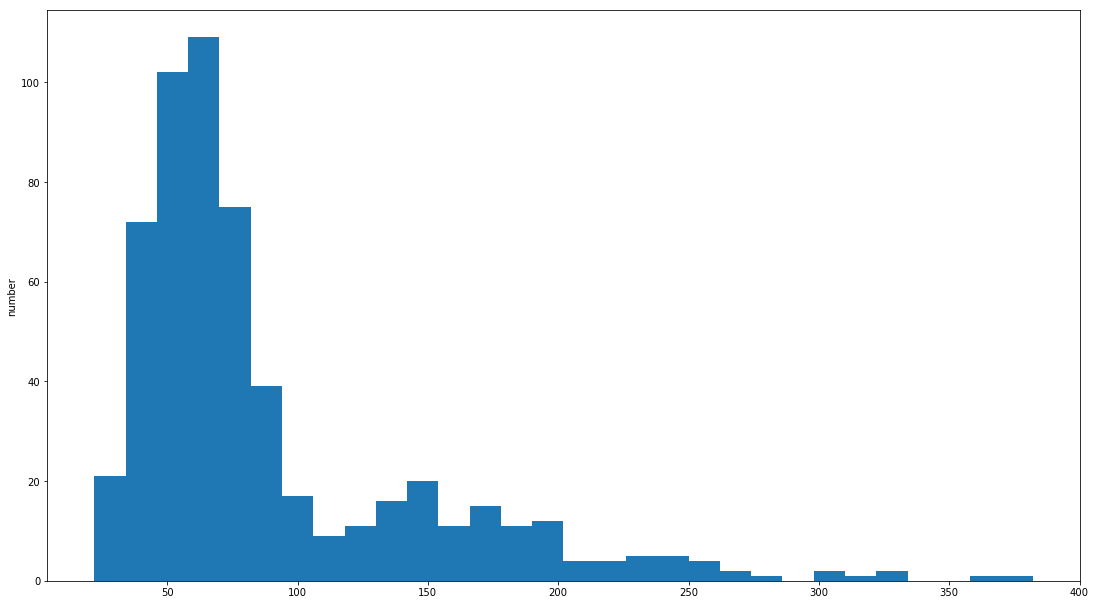

In [173]:
import glob

lenIS=[]

protocol = 'IS'
for subj in subjsProt[protocol]:
    fgFolder = '../WillSense/code/WS/'+protocol+'/'+subj+'/feeding_gestures/'
    txtFiles = glob.glob(fgFolder + "*.txt")
    txtFilesS=sorted(txtFiles)
    for file in txtFilesS:
        lenIS.append(int(read_first_line(file)))
        
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.hist(np.asarray(lenIS), bins=30)
plt.ylabel('number');

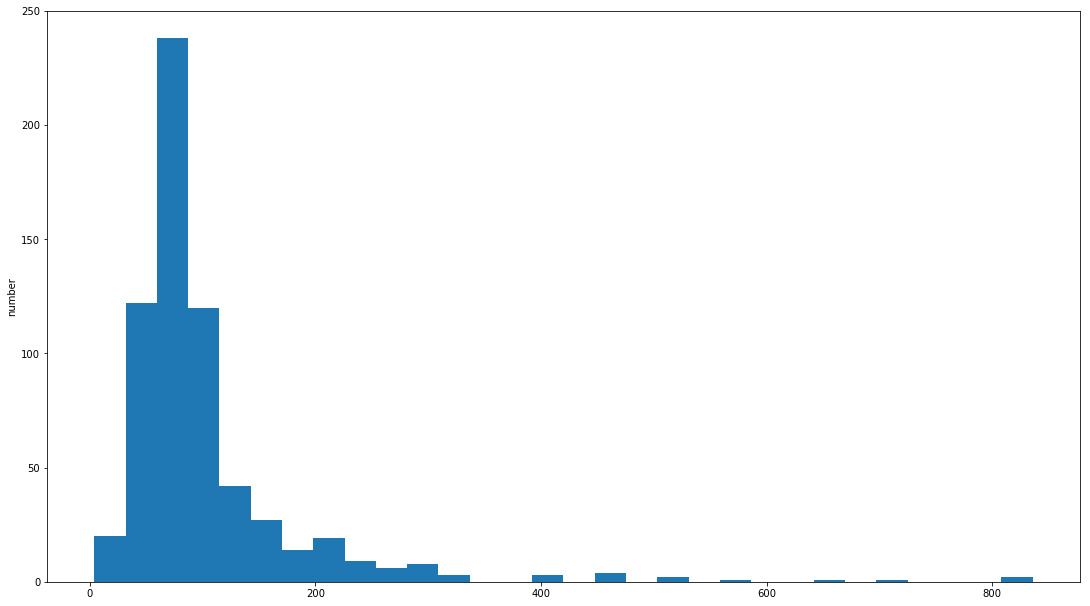

In [174]:
import glob

lenUS=[]

protocol = 'US'
for subj in subjsProt[protocol]:
    fgFolder = '../WillSense/code/WS/'+protocol+'/'+subj+'/feeding_gestures/'
    txtFiles = glob.glob(fgFolder + "*.txt")
    txtFilesS=sorted(txtFiles)
    for file in txtFilesS:
        lenUS.append(int(read_first_line(file)))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.hist(np.asarray(lenUS), bins=30)
plt.ylabel('number');

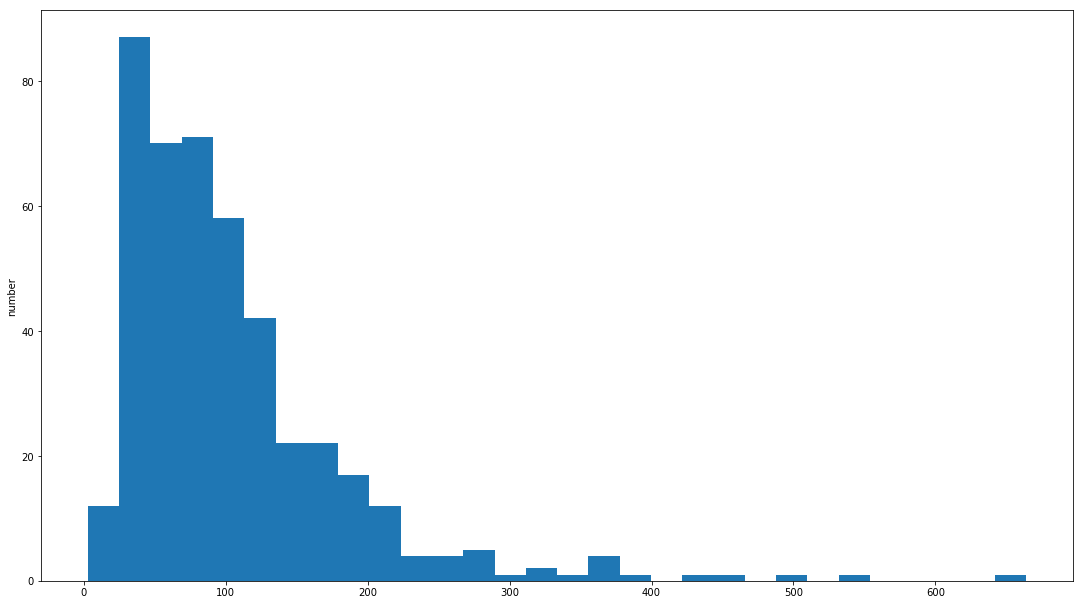

In [175]:
import glob

lenFld=[]

protocol = 'Field'
for subj in subjsProt[protocol]:
    fgFolder = '../WillSense/code/WS/'+pathProt[protocol]+'/'+subj+'/feeding_gestures/'
    txtFiles = glob.glob(fgFolder + "*.txt")
    txtFilesS=sorted(txtFiles)
    for file in txtFilesS:
        lenFld.append(int(read_first_line(file)))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.hist(np.asarray(lenFld), bins=30)
plt.ylabel('number');

# generate nonFeeding samples

In [230]:
from random import randint


def getNonFeedingIndex(protocol, lenProt):
    if protocol == 'IS' or protocol == 'US':
        columns = ['Time','Angular_Velocity_x','Angular_Velocity_y','Angular_Velocity_z','Linear_Accel_x','Linear_Accel_y','Linear_Accel_z','unixtime','synctime','feedingClass','nonfeedingClass']
    if protocol == 'Field':
        columns = ['Angular_Velocity_x','Angular_Velocity_y','Angular_Velocity_z','Linear_Accel_x','Linear_Accel_y','Linear_Accel_z','label']
    df_l = []
    
    subjs = subjsProt[protocol]

    for subj in subjs:
        
        file_path = '../WillSense/code/WS/'+pathProt[protocol]+'/'+subj+'/testdata_labeled.csv'
        df = pd.read_csv(file_path)
        if protocol == 'IS' or protocol == 'US':
            pw = df.feedingClass.as_matrix()
            print(np.unique(pw))
        if protocol == 'Field':
            pw = df.label.as_matrix()
            print(np.unique(pw))

        pw = pw.astype(int)
        
#         find the nonFeeding chunks
        diff = np.hstack((pw,1)) - np.hstack((1,pw))
        head_list = np.where( diff == -1 )[0]
        tail_list = np.where( diff == 1 )[0]
        len_list = tail_list - head_list
        htl_list = np.vstack((head_list,tail_list,len_list))
        
        
        htl_list = htl_list.T
        htl_list = htl_list[htl_list[:,2].argsort()]
        
        nSt = htl_list[-1,0]
        nEnd = htl_list[-1,1]-1000
        
        nfgFolder = '../WillSense/code/WS/'+pathProt[protocol]+'/'+subj+'/nonFeedingGestures/'
        if not os.path.exists(nfgFolder):
            os.makedirs(nfgFolder)
            
        for i in range(len(lenProt)):
            st = randint(nSt, nEnd)
            l = lenProt[i]

            end = st + l
            df.iloc[st:end].to_csv(nfgFolder + 'nfg_' + str(i) + '.csv')
            
            text_file = open(nfgFolder + 'len_' + str(i) + '.txt', 'w')
            text_file.write('%d' % l)
            text_file.close()


        
        
        
            
        
        
#         return htl_list
        
#         nfg_folder = '../WillSense/code/WS/'+pathProt[protocol]+'/'+subj+'/nonFeedingGestures/'
#         if not os.path.exists(nfg_folder):
#             os.makedirs(nfg_folder)
            
#         for i in range(len(head_list)):
#             df.iloc[head_list[i]:tail_list[i]].to_csv(fg_folder + '/fg_' + str(i) + '.csv')
            
#             text_file = open(fg_folder + 'len_' + str(i) + '.txt', 'w')
#             text_file.write('%d' % (tail_list[i]-head_list[i]))
#             text_file.close()

In [231]:
getNonFeedingIndex('IS', lenIS)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [232]:
getNonFeedingIndex('US', lenUS)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [233]:
getNonFeedingIndex('Field', lenUS)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
